In [82]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [83]:
#read files 
iris_neighborhoods = gpd.read_file("Data/IRIS_iledefrance.geojson")
insee_census = pd.read_csv("Data/cleaned_insee-census-2021.csv")


In [96]:
iris_neighborhoods.head(2)

,OBJECTID,INSEE_COM,NOM_COM,IRIS,CODE_IRIS,NOM_IRIS,TYP_IRIS,unemployment,geometry
0,24,75111,Paris 11e Arrondissement,4307,751114307,Roquette 7,H,0.08,"MULTIPOLYGON (((2.37788 48.85678, 2.37886 48.8..."
1,36,75111,Paris 11e Arrondissement,4203,751114203,Saint-Ambroise 3,H,0.09,"MULTIPOLYGON (((2.37931 48.86307, 2.37889 48.8..."


In [97]:
insee_census.head(2)

,CODE_IRIS,P21_POP1564,P21_ACTOCC1564,P21_CHOM1564,P21_ETUD1564,C21_ACTOCC15P_PAS,C21_ACTOCC15P_MAR,C21_ACTOCC15P_VELO,C21_ACTOCC15P_2ROUESMOT,C21_ACTOCC15P_VOIT,C21_ACTOCC15P_TCOM,Unemployment
0,10010000,509,390,27,34,19,0,0,10,402,5,5.304519
1,10020000,163,128,2,18,5,0,0,0,103,5,1.226994


In [86]:
#rename colomn names 
insee_census.rename(columns={'IRIS': 'CODE_IRIS'}, inplace=True)

In [87]:
#add new column and calculate unemplyement
insee_census["Unemployment"] = (insee_census["P21_CHOM1564"] / insee_census["P21_POP1564"]) *100 

In [89]:
#merged neighborhoods with census data 
merged = iris_neighborhoods.merge(insee_census, how="left", left_on="CODE_IRIS", right_on="CODE_IRIS")


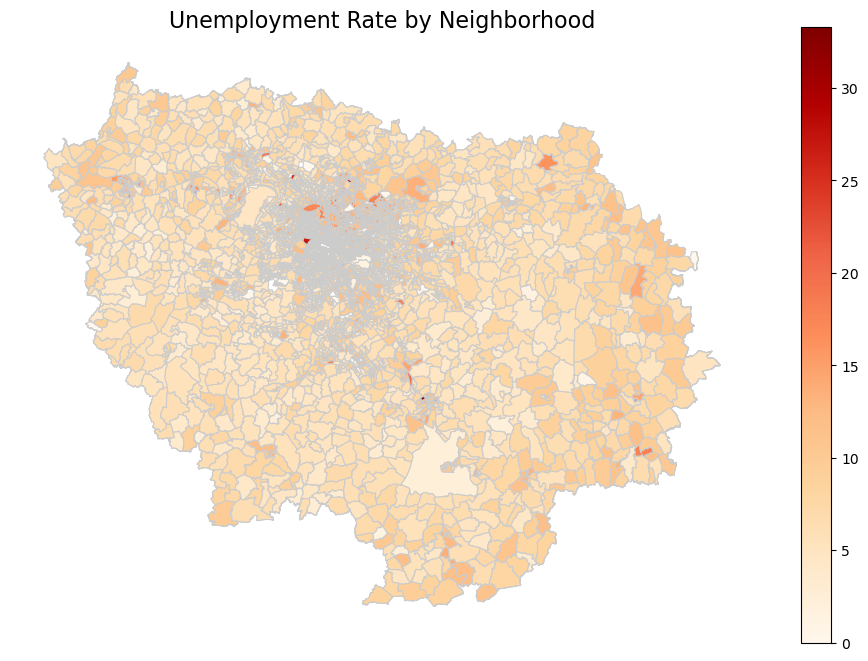

In [98]:
#choropleth making 

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

merged.plot(
    column="Unemployment",          # The variable you want to visualize
    cmap="OrRd",               # Color scheme ("OrRd", "Blues", "Viridis", etc.)
    legend=True,               # Add legend
    linewidth=0.8,
    edgecolor="0.8",
    ax=ax
)

ax.set_title("Unemployment Rate by Neighborhood", fontsize=16)
ax.axis("off")
plt.show()


In [99]:
#calculating centroids
merged["centroid"] = merged.geometry.centroid

/tmp/ipykernel_3609/998255305.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged["centroid"] = merged.geometry.centroid


In [108]:
#download as a csv
#merged.to_csv("Joined INSEE and Census Data with Centroids.csv", index=False)